# Yesterday
- Introduction to data analysis
- Pandas

In [ ]:
!git clone http://www.github.com/PrefaceCoding/M1L5

Cloning into 'M1L5'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("M1L5/Salaries.csv")

In [ ]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [ ]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [ ]:
# What is average Base Pay?
df["BasePay"].mean()

66325.44884050643

In [ ]:
# What is max OvertimePay?
df["OvertimePay"].max()

245131.88

In [ ]:
# What is JOSEPH DRISCOLL job title?
df[df["EmployeeName"] == "JOSEPH DRISCOLL"]["JobTitle"]

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [ ]:
# What is his Total Pay
df[df["EmployeeName"] == "JOSEPH DRISCOLL"]["TotalPayBenefits"]

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [ ]:
# What is the name of the person with highest Total Pay Benefits
df["TotalPayBenefits"].max()

567595.43

In [ ]:
df[df["TotalPayBenefits"] == 567595.43]["EmployeeName"]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [ ]:
df[df["TotalPayBenefits"] == df["TotalPayBenefits"].max()]["EmployeeName"]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [ ]:
df[df["TotalPayBenefits"] == df["TotalPayBenefits"].min()]["EmployeeName"]

148653    Joe Lopez
Name: EmployeeName, dtype: object

In [ ]:
df["TotalPayBenefits"].min()

-618.13

In [ ]:
# From 2011-2014, for each year, what is the average Base Pay for all employees?
# 2011: ...
# 2012: ...

In [ ]:
df[df["Year"] == 2011]["BasePay"].mean()

63595.956516774524

In [ ]:
df[df["Year"] == 2012]["BasePay"].mean()

65436.40685742255

In [ ]:
df[df["Year"] == 2013]["BasePay"].mean()

69630.0302164812

In [ ]:
df[df["Year"] == 2014]["BasePay"].mean()

66564.42192449933

In [ ]:
for year in [2011, 2012, 2013, 2014]:
  print(df[df["Year"] == year]["BasePay"].mean())

63595.956516774524
65436.40685742255
69630.0302164812
66564.42192449933


In [ ]:
# Group by

df.groupby("Year").mean()["BasePay"]

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [ ]:
# Group by job titles and find mean Base Pay

df.groupby("JobTitle").mean()["BasePay"]

JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2159, dtype: float64

In [ ]:
# How many unique job titles?

df["JobTitle"].nunique()

2159

In [ ]:
# What are the top 5 most common jobs?

df["JobTitle"].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [ ]:
# How many unique job titles in 2013?

df[df["Year"] == 2013]["JobTitle"].nunique()

1051

In [ ]:
# How many people have the word Chief in their job title?

def has_chief(job_title):
  return "chief" in job_title.lower()

len(df[df["JobTitle"].apply(has_chief)])

627

In [ ]:
len(df[df["JobTitle"].apply(lambda x: "chief" in x.lower())])

627

In [ ]:
True + True + True

3

In [ ]:
sum(df["JobTitle"].apply(lambda x: "chief" in x.lower()))

627

# A bit more Pandas, more advanced data analysis

In [ ]:
import datetime

In [ ]:
from datetime import date, datetime

In [ ]:
datetime(2001, 1, 1)

datetime.datetime(2001, 1, 1, 0, 0)

In [ ]:
date(2001, 1, 1)

datetime.date(2001, 1, 1)

In [ ]:
dt = datetime(2001, 1, 1)

In [ ]:
dt.year

2001

In [ ]:
dt.month

1

In [ ]:
dt.minute

0

In [ ]:
datetime.now() # UTC

datetime.datetime(2021, 6, 13, 7, 19, 50, 822377)

In [ ]:
hk_hour = datetime.now().hour + 8

In [ ]:
hk_hour

15

# Pandas DataReader

In [ ]:
from pandas_datareader import data

In [ ]:
start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)

In [ ]:
type(data.DataReader("AAPL", "yahoo", start, end))

pandas.core.frame.DataFrame

In [ ]:
df = data.DataReader("AAPL", "yahoo", start, end)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.819241
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.120045
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.122320
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.460564
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.400398


In [ ]:
df.iloc[0]

High         2.786000e+01
Low          2.683750e+01
Open         2.784750e+01
Close        2.733250e+01
Volume       2.128184e+08
Adj Close    2.481924e+01
Name: 2015-01-02 00:00:00, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-01-02 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


In [ ]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,38.939050,38.268752,38.599344,38.619141,1.435996e+08,36.924235
std,11.103250,10.925538,11.002370,11.029897,7.153802e+07,11.375593
min,22.917500,22.367500,22.500000,22.584999,4.544800e+07,21.098566
25%,29.130624,28.627500,28.950001,28.876250,9.512290e+07,26.767294
50%,38.012501,37.293751,37.593750,37.638750,1.263050e+08,36.048203
75%,46.845624,46.167500,46.500627,46.500626,1.714582e+08,45.076899
max,73.492500,72.379997,72.779999,73.412498,6.488252e+08,72.552094


In [ ]:
df["High"]

Date
2015-01-02    27.860001
2015-01-05    27.162500
2015-01-06    26.857500
2015-01-07    27.049999
2015-01-08    28.037500
                ...    
2019-12-24    71.222504
2019-12-26    72.495003
2019-12-27    73.492500
2019-12-30    73.172501
2019-12-31    73.419998
Name: High, Length: 1258, dtype: float64

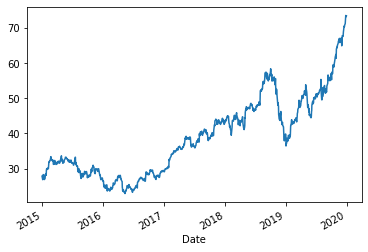

In [ ]:
df["High"].plot()

In [ ]:
df[["High", "Low"]]

,High,Low
Date,,
2015-01-02,27.860001,26.837500
2015-01-05,27.162500,26.352501
2015-01-06,26.857500,26.157499
2015-01-07,27.049999,26.674999
2015-01-08,28.037500,27.174999
...,...,...
2019-12-24,71.222504,70.730003
2019-12-26,72.495003,71.175003
2019-12-27,73.492500,72.029999


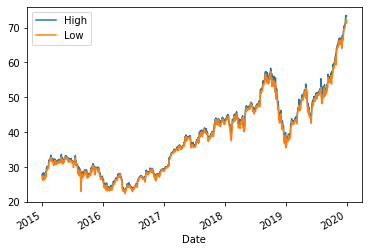

In [ ]:
df[["High", "Low"]].plot()

In [ ]:
import matplotlib.pyplot as plt # data visualization tool

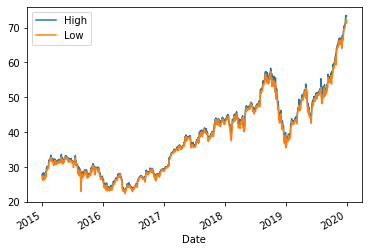

In [ ]:
df[["High", "Low"]].plot()
plt.savefig("Apple_High_Low.png")

In [ ]:
df["High"].max()

73.49250030517578

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.819241
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.120045
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.122320
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.460564
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.400398


In [ ]:
df["High"].idxmax()

Timestamp('2019-12-27 00:00:00')

In [ ]:
df["High"].idxmin()

Timestamp('2016-05-13 00:00:00')

In [ ]:
df["Close"].sort_values()

Date
2016-05-12    22.584999
2016-05-13    22.629999
2016-06-27    23.010000
2016-05-11    23.127501
2016-05-06    23.180000
                ...    
2019-12-24    71.067497
2019-12-27    72.449997
2019-12-26    72.477501
2019-12-30    72.879997
2019-12-31    73.412498
Name: Close, Length: 1258, dtype: float64

In [ ]:
df["Close"].sort_values(ascending=False)

Date
2019-12-31    73.412498
2019-12-30    72.879997
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-24    71.067497
                ...    
2016-05-06    23.180000
2016-05-11    23.127501
2016-06-27    23.010000
2016-05-13    22.629999
2016-05-12    22.584999
Name: Close, Length: 1258, dtype: float64

In [ ]:
df["Close"].pct_change()

Date
2015-01-02         NaN
2015-01-05   -0.028172
2015-01-06    0.000094
2015-01-07    0.014022
2015-01-08    0.038422
                ...   
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
2019-12-31    0.007307
Name: Close, Length: 1258, dtype: float64

In [ ]:
df[df["Close"].pct_change() > 0]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.122320
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.460564
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.400398
2015-01-09,28.312500,27.552500,28.167500,28.002501,214798000.0,25.427635
2015-01-13,28.200001,27.227501,27.857500,27.555000,268367600.0,25.021282
...,...,...,...,...,...,...
2019-12-23,71.062500,70.092499,70.132500,71.000000,98572000.0,70.167885
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.234581
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.628067


In [ ]:
df.loc["2019-12-30"]

High         7.317250e+01
Low          7.130500e+01
Open         7.236500e+01
Close        7.288000e+01
Volume       1.441144e+08
Adj Close    7.202583e+01
Name: 2019-12-30 00:00:00, dtype: float64

In [ ]:
# how to compute the moving average?
df["Close"].rolling(window=30).mean()

Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
                ...    
2019-12-24    67.359250
2019-12-26    67.592167
2019-12-27    67.803250
2019-12-30    68.043916
2019-12-31    68.276333
Name: Close, Length: 1258, dtype: float64

In [ ]:
# What if I have a portfolio and not just 1 stock?

In [ ]:
tsla = data.DataReader("TSLA", "yahoo", start, end)
msft = data.DataReader("MSFT", "yahoo", start, end)

In [ ]:
portfolio = pd.concat([tsla, msft], axis=1, keys=["TSLA", "MSFT"])

In [ ]:
portfolio["Close"]

KeyError: ignored

In [ ]:
portfolio["MSFT"]["Close"]

Date
2015-01-02     46.759998
2015-01-05     46.330002
2015-01-06     45.650002
2015-01-07     46.230000
2015-01-08     47.590000
                 ...    
2019-12-24    157.380005
2019-12-26    158.669998
2019-12-27    158.960007
2019-12-30    157.589996
2019-12-31    157.699997
Name: Close, Length: 1258, dtype: float64

In [ ]:
portfolio.columns

MultiIndex([('TSLA',      'High'),
            ('TSLA',       'Low'),
            ('TSLA',      'Open'),
            ('TSLA',     'Close'),
            ('TSLA',    'Volume'),
            ('TSLA', 'Adj Close'),
            ('MSFT',      'High'),
            ('MSFT',       'Low'),
            ('MSFT',      'Open'),
            ('MSFT',     'Close'),
            ('MSFT',    'Volume'),
            ('MSFT', 'Adj Close')],
           )

In [ ]:
portfolio.columns.names = ["Ticker", "Info"]

In [ ]:
portfolio.columns.names

FrozenList(['Ticker', 'Info'])

In [ ]:
# Cross Section

portfolio_close = portfolio.xs(key="Close", axis=1, level="Info") # if column xs, axis = 1

In [ ]:
portfolio_close.max()

Ticker
TSLA     86.188004
MSFT    158.960007
dtype: float64

In [ ]:
portfolio_close.min()

Ticker
TSLA    28.733999
MSFT    40.290001
dtype: float64

In [ ]:
portfolio_close.idxmax()

Ticker
TSLA   2019-12-26
MSFT   2019-12-27
dtype: datetime64[ns]

In [ ]:
portfolio_close.pct_change()

Ticker,TSLA,MSFT
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.042041,-0.009196
2015-01-06,0.005664,-0.014677
2015-01-07,-0.001562,0.012705
2015-01-08,-0.001564,0.029418
...,...,...
2019-12-24,0.014384,-0.000191
2019-12-26,0.013380,0.008197
2019-12-27,-0.001300,0.001828


In [ ]:
portfolio

Ticker           TSLA                        ...        MSFT                        
Info             High        Low       Open  ...       Close      Volume   Adj Close
Date                                         ...                                    
2015-01-02  44.650002  42.652000  44.574001  ...   46.759998  27913900.0   41.348206
2015-01-05  43.299999  41.431999  42.910000  ...   46.330002  39673900.0   40.967976
2015-01-06  42.840000  40.841999  42.012001  ...   45.650002  36447900.0   40.366688
2015-01-07  42.956001  41.956001  42.669998  ...   46.230000  29114100.0   40.879539
2015-01-08  42.759998  42.001999  42.562000  ...   47.590000  29645200.0   42.082142
...               ...        ...        ...  ...         ...         ...         ...
2019-12-24  85.094002  82.538002  83.671997  ...  157.380005   8989200.0  155.014450
2019-12-26  86.695999  85.269997  85.582001  ...  158.669998  14520600.0  156.285065
2019-12-27  87.061996  85.222000  87.000000  ...  158.960007  18412800.0  156.570709
2019-12-30  85.800003  81.851997  85.758003  ...  157.589996  16348400.0  155.221313
2019-12-31  84.258003  80.416000  81.000000  ...  157.699997  18369400.0  155.329636

[1258 rows x 12 columns]

In [ ]:
portfolio["Close"]

KeyError: ignored

# More data analysis + visualization

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11878 entries, 0 to 11877
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Case no.                          11878 non-null  int64  
 1   Report date                       11878 non-null  object 
 2   Date of onset                     11878 non-null  object 
 3   Gender                            11878 non-null  object 
 4   Age                               11878 non-null  int64  
 5   Name of hospital admitted         0 non-null      float64
 6   Hospitalised/Discharged/Deceased  11878 non-null  object 
 7   HK/Non-HK resident                11878 non-null  object 
 8   Case classification*              11878 non-null  object 
 9   Confirmed/probable                11878 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 928.1+ KB


In [ ]:
df.describe()

,Case no.,Age,Name of hospital admitted
count,11878.000000,11878.000000,0.0
mean,5939.500000,44.153645,NaN
std,3429.027583,19.760655,NaN
min,1.000000,0.000000,NaN
25%,2970.250000,30.000000,NaN
50%,5939.500000,43.000000,NaN
75%,8908.750000,59.000000,NaN
max,11878.000000,100.000000,NaN


In [ ]:
df[df["Age"] == df["Age"].max()]

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
3568,3569,03/08/2020,02/08/2020,F,100,NaN,Discharged,HK resident,Epidemiologically linked with local case,Confirmed
8621,8622,28/12/2020,21/12/2020,F,100,NaN,Discharged,HK resident,Epidemiologically linked with local case,Confirmed


In [ ]:
df["Case classification*"].value_counts()

Epidemiologically linked with local case             6021
Local case                                           3160
Imported case                                        2478
Possibly local case                                   103
Epidemiologically linked with possibly local case      62
Epidemiologically linked with imported case            54
Name: Case classification*, dtype: int64

In [ ]:
df["Hospitalised/Discharged/Deceased"].value_counts()

Discharged        11595
Deceased            210
Hospitalised         39
No admission         31
To be provided        3
Name: Hospitalised/Discharged/Deceased, dtype: int64

In [ ]:
# Groupby
df.groupby("Hospitalised/Discharged/Deceased").mean()["Age"]

Hospitalised/Discharged/Deceased
Deceased          78.200000
Discharged        43.553083
Hospitalised      45.692308
No admission      37.161290
To be provided    34.333333
Name: Age, dtype: float64

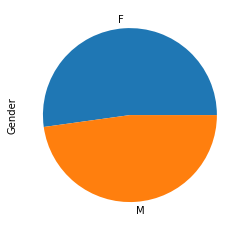

In [ ]:
df["Gender"].value_counts().plot(kind="pie")

In [ ]:
plt.savefig("Gender_breakdown.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualization using Seaborn (SNS)

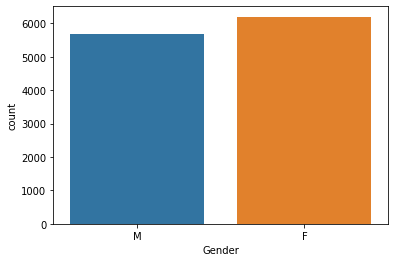

In [ ]:
# x-axis (M or F)
# y-axis (Actual no.)

sns.countplot(x="Gender", data=df)

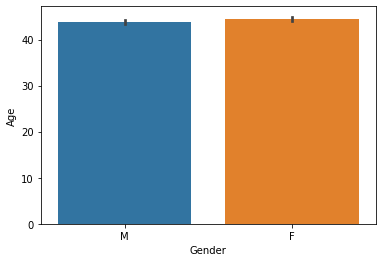

In [ ]:
sns.barplot(x="Gender", y="Age", data=df)

In [ ]:
df.groupby("Gender").mean()["Age"]

Gender
F    44.456364
M    43.823208
Name: Age, dtype: float64

In [ ]:
df.describe()

,Case no.,Age,Name of hospital admitted
count,11878.000000,11878.000000,0.0
mean,5939.500000,44.153645,NaN
std,3429.027583,19.760655,NaN
min,1.000000,0.000000,NaN
25%,2970.250000,30.000000,NaN
50%,5939.500000,43.000000,NaN
75%,8908.750000,59.000000,NaN
max,11878.000000,100.000000,NaN


In [ ]:
len(df[df["Age"] == df["Age"].min()])

54

In [ ]:
df[df["Age"] == df["Age"].min()]

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
756,757,01/04/2020,30/03/2020,M,0,NaN,Discharged,HK resident,Epidemiologically linked with local case,Confirmed
952,953,08/04/2020,Asymptomatic,M,0,NaN,Discharged,HK resident,Imported case,Confirmed
1329,1330,09/07/2020,Asymptomatic,M,0,NaN,Discharged,HK resident,Imported case,Confirmed
1501,1502,13/07/2020,Asymptomatic,M,0,NaN,Discharged,HK resident,Imported case,Confirmed
2107,2108,22/07/2020,19/07/2020,F,0,NaN,Discharged,HK resident,Epidemiologically linked with local case,Confirmed
2172,2173,23/07/2020,19/07/2020,M,0,NaN,Discharged,HK resident,Epidemiologically linked with local case,Confirmed
3531,3532,03/08/2020,21/07/2020,F,0,NaN,Discharged,HK resident,Epidemiologically linked with local case,Confirmed
3883,3884,07/08/2020,26/07/2020,F,0,NaN,Discharged,HK resident,Epidemiologically linked with local case,Confirmed
3884,3885,07/08/2020,26/07/2020,F,0,NaN,Discharged,HK resident,Epidemiologically linked with local case,Confirmed
4477,4478,16/08/2020,Asymptomatic,M,0,NaN,Discharged,HK resident,Epidemiologically linked with local case,Confirmed


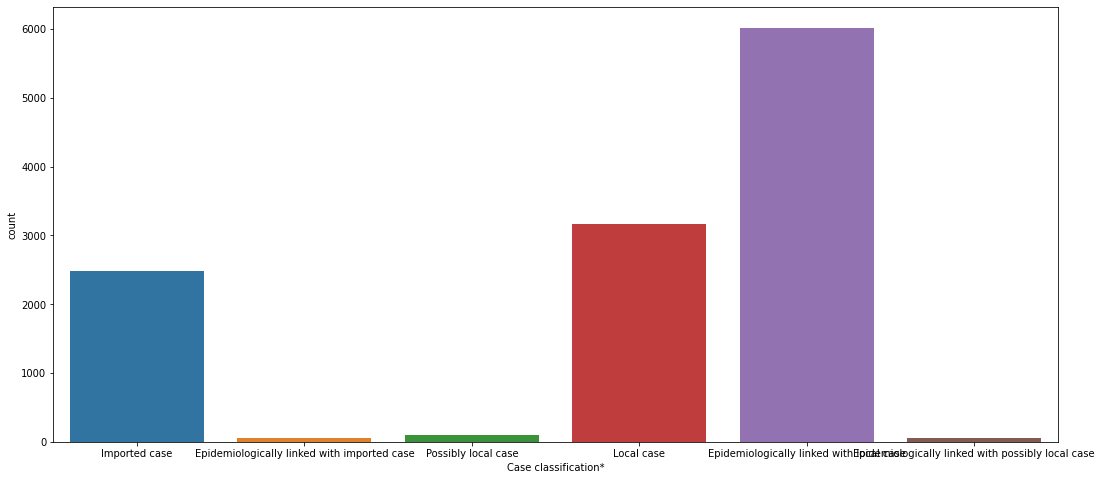

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(x="Case classification*", data=df)

In [ ]:
df["Case classification*"].value_counts()

Epidemiologically linked with local case             6021
Local case                                           3160
Imported case                                        2478
Possibly local case                                   103
Epidemiologically linked with possibly local case      62
Epidemiologically linked with imported case            54
Name: Case classification*, dtype: int64

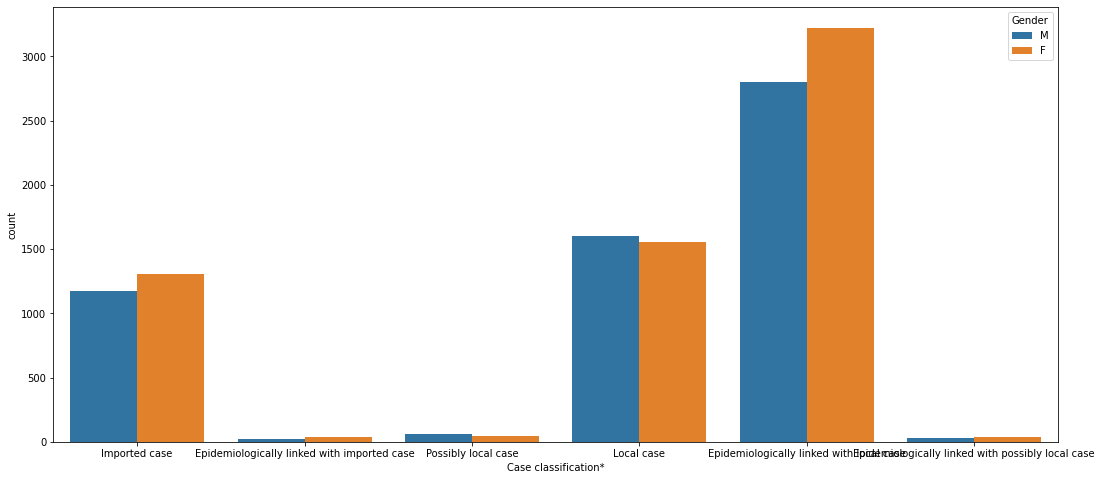

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(x="Case classification*", data=df, hue="Gender")

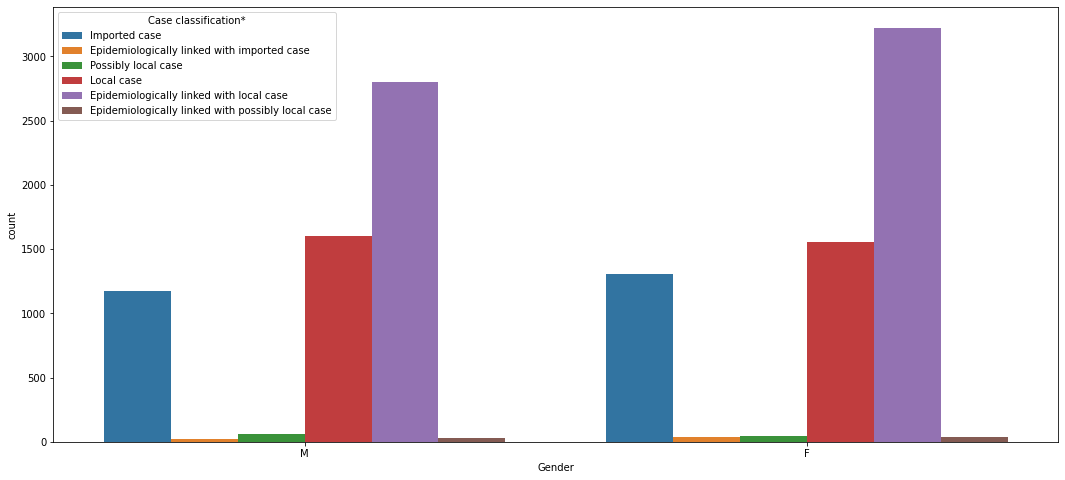

In [ ]:
# x-axis - M or F (break down into case classification)
plt.figure(figsize=(18, 8))
sns.countplot(x="Gender", data=df, hue="Case classification*")

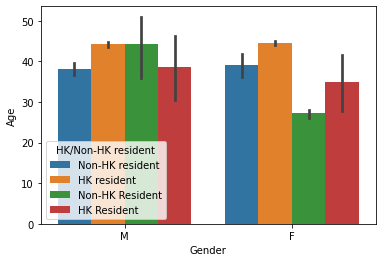

In [ ]:
sns.barplot(x="Gender", y="Age", data=df, hue="HK/Non-HK resident")

In [ ]:
original = ["HK resident", "Non-HK resident"]
new = ["HK Resident", "Non-HK Resident"]

df["HK/Non-HK resident"] = df["HK/Non-HK resident"].replace(original, new)

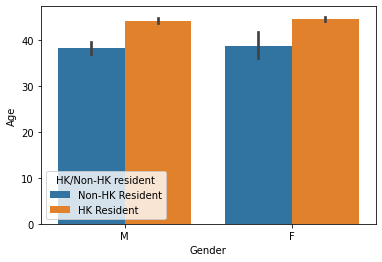

In [ ]:
sns.barplot(x="Gender", y="Age", data=df, hue="HK/Non-HK resident")

In [ ]:
# countplot
# barplot

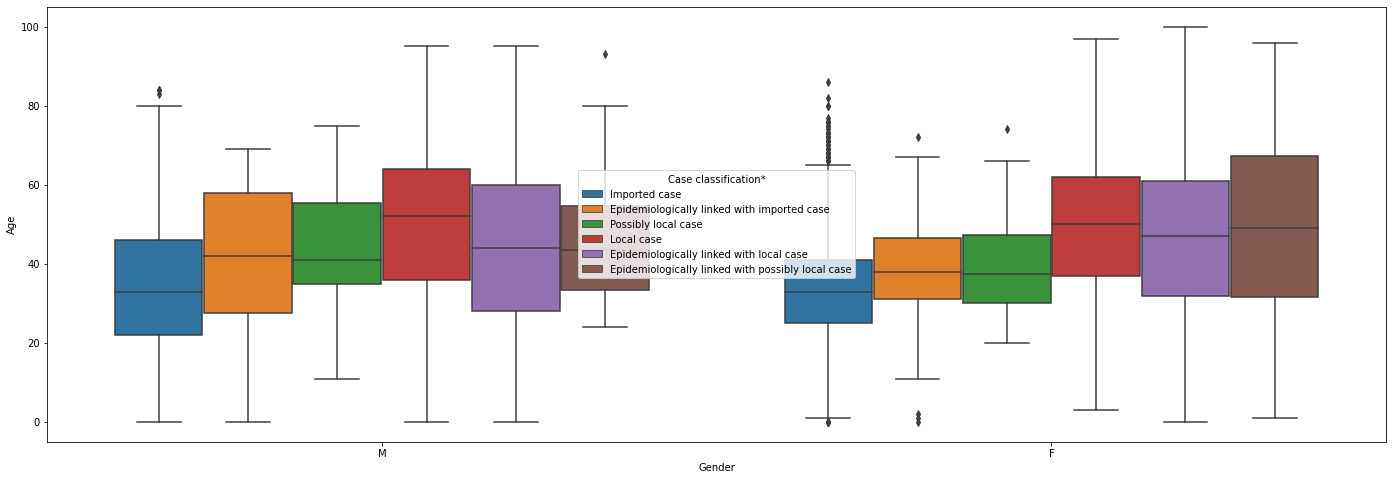

In [ ]:
# boxplot

plt.figure(figsize=(24, 8))
sns.boxplot(x="Gender", y="Age", data=df, hue="Case classification*")

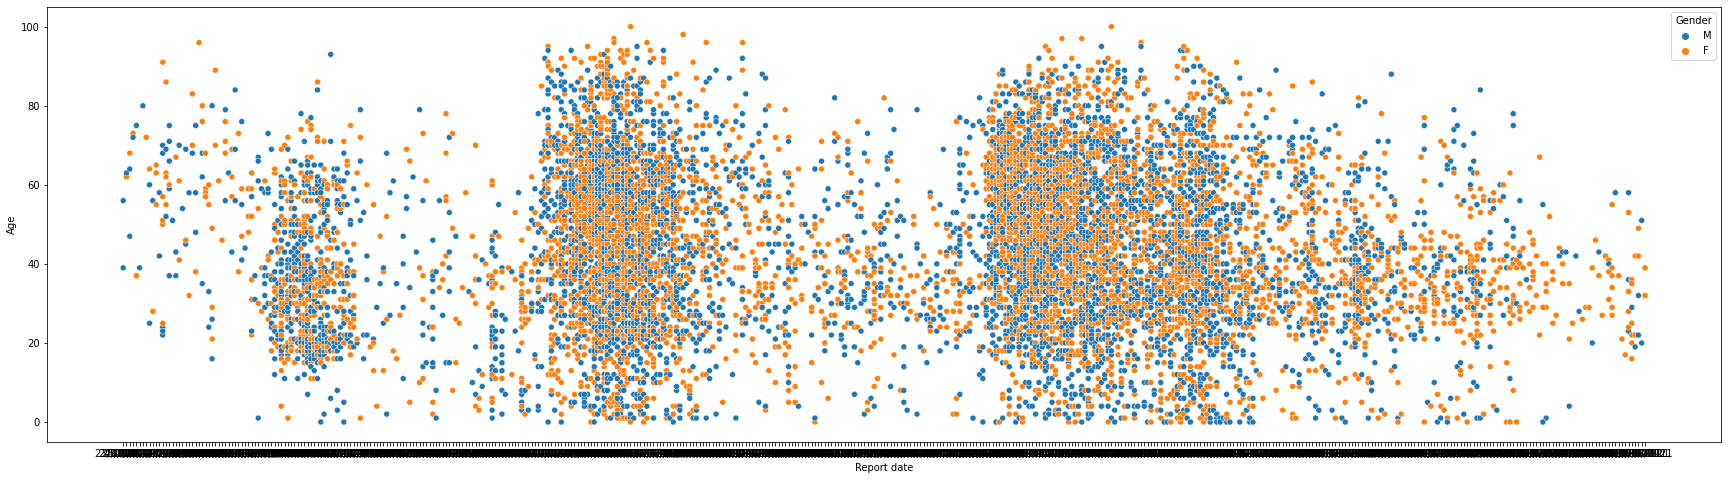

In [ ]:
# Scatter plot

plt.figure(figsize=(30, 8))
sns.scatterplot(x="Report date", y="Age", data=df, hue="Gender")

In [ ]:
# Recap

# Day 1: Python, Programming fundamentals (4 steps)
# 4 steps: data types, methods, programming logic, libraries
# string, integer, float, boolean, list

# Day 2: Dictionary + Web scraping (API, XML)

# Day 3: Pandas (CRUD, methods, function), Data Analysis

# Day 4: More Pandas (Pandas DataReader, advanced functions)
# Data visualization (Matplotlib, Seaborn)